# 常微分方程式

## 1 階の線型常微分方程式

一番単純でしかも実際に使われる微分方程式としてまずは 1 階の線型常微分方程式を考えよう.
ちょっと不吉な例であるが**放射性物質の崩壊の方程式**を紹介する.
導出をしたければちゃんと物理を勉強してもらう必要がある.
ここでは物理は省略して数学に集中する.

\begin{align}
 \frac{dx}{dt} = - c x.
\end{align}
厳密解は $x = C_0 e^{-ct}$ だ.
初期値を設定すれば $C_0$ はそこから決まる.

微分を単純に離散化すると次のようになる.

\begin{align}
 \frac{x_{n+1} - x_{n}}{\Delta t}
 =
 -c x_{n}.
\end{align}

$\Delta t$ は $h$ と書くこともある.
整理すると次の通り.

\begin{align}
 x_{n+1}
 =
 x_{n} - c (\Delta t) x_{n}.
\end{align}

これに沿って計算したのがいわゆるオイラー法.
次のセルではこれをコードに落としている.

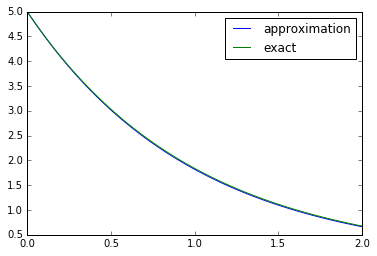

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

def radioactive_euler(nt, init = 10):
    dt = 2 / (nt - 1)
    # 初期条件設定
    x = np.zeros(nt)
    x[0] = init

    for i in range(1, nt):
        x[i] = x[i-1] - c * dt * x[i-1]

    # ブロードキャストすると適切な値が計算できない？
    # 要調査
    # x[1:] = x[0:-1] - c * dt * x[0:-1]

    return x

# 近似解
c = 1
nt = 101
init = 5
x1 = radioactive_euler(nt, init)
plt.plot(np.linspace(0, 2, nt), x1)

# 厳密解
t = np.linspace(0, 2, nt)
x2 = init * np.exp(- c * t)
plt.plot(t, x2)

# 凡例
plt.legend(['approximation', 'exact'])
# 描画
plt.show()

### ルンゲ-クッタ法

少なくとも上の図示の限りではほとんど違いが見られないくらい精度がいい.
ただいろいろやっているとオイラー法の限界もいろいろ見える.
ちょっと先走ってルンゲ-クッタ法で実装してみよう.
結果は次の通り: 面倒なので導出は省略する.

とりあえず一般的な次の次の初期値問題を考えよう.
\begin{align}
 \frac{dx}{dt}
 =
 f(t, x), \quad
 x(t_0)
 =
 x_{0}.
\end{align}

とりあえず右辺は $f$ で一般化しておいた.
上の例でいうと $f(t, x) = x$ だ.

ではルンゲ-クッタ法による式 (数列から見れば漸化式) を書いてみる.

\begin{align}
 x_{n+1}
 &=
 x_{n} + \frac{h}{6} (k_{1} + 2 k_{2} + 2 k_{3} + k_{4}), \\
 t_{n+1}
 &=
 t_{n} + h.
\end{align}

$h$ はさっき $\Delta t$ と書いた量だ.
そして $k_{i}$ は次のように定義している.

\begin{align}
 k_{1}
 &=
 f \left(t_{n}, x_{n} \right), \\
 k_{2}
 &=
 f \left(t_{n} + \frac{h}{2}, x_{n} + \frac{h}{2} k_{1} \right), \\
 k_{3}
 &=
 f \left(t_{n} + \frac{h}{2}, x_{n} + \frac{h}{2} k_{2} \right), \\
 k_{4}
 &=
 f \left(t_{n} + h, x_{n}+ h k_{3} \right).
\end{align}

### 放射性物質の崩壊の方程式で書き直す

最初の式は変わらない.
$k_{i}$ を書き直せばいいだけだ.

\begin{align}
 x_{n+1}
 &=
 x_{n} + \frac{h}{6} (k_{1} + 2 k_{2} + 2 k_{3} + k_{4}), \\
 t_{n+1}
 &=
 t_{n} + h, \\
 k_{1}
 &=
 x_{n}, \\
 k_{2}
 &=
 x_{n} + \frac{h}{2} k_{1}, \\
 k_{3}
 &=
 x_{n} + \frac{h}{2} k_{2}, \\
 k_{4}
 &=
 x_{n}+ h k_{3}.
\end{align}

ではコードに落としてみよう.

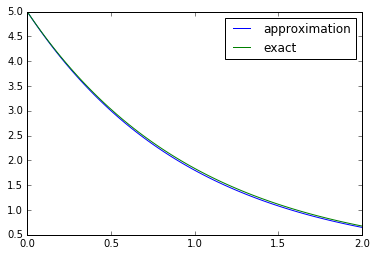

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

def radioactive_rk(nt, init = 10):
    dt = 2 / (nt - 1)
    # 初期条件設定
    x = np.zeros(nt)
    x[0] = init

    # ブロードキャストで書き直したい
    for i in range(1, nt):
        k1 = x[i-1]
        k2 = x[i-1] + k1 * dt / 2
        k3 = x[i-1] + k2 * dt / 2
        k4 = x[i-1] + k3 * dt
        x[i] = x[i-1] - c * dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

    return x

# 近似解
c = 1
nt = 101
init = 5
x1 = radioactive_rk(nt, init)
t = np.linspace(0, 2, nt)
plt.plot(np.linspace(0, 2, nt), x1)

# 厳密解
x2 = init * np.exp(- c * t)
plt.plot(t, x2)

# 凡例設定
plt.legend(['approximation', 'exact'])
# 描画
plt.show()

関数化してちょっと書き直し.

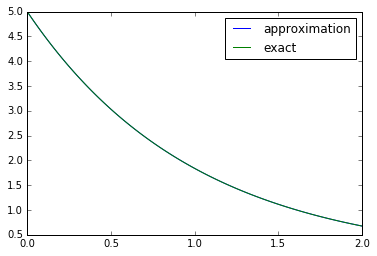

In [66]:
# coding: utf-8
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

def radioactive_rk(nt, init = 10):
    dt = 2 / (nt - 1)
    # 初期条件設定
    x = np.zeros(nt)
    x[0] = init

    def f(t, x):
        return -x

    # ブロードキャストで書き直したい
    for i in range(1, nt):
        k1 = f(dt * (i - 1), x[i-1])
        k2 = f(dt * (i - 1/2), x[i-1] + k1 * dt / 2)
        k3 = f(dt * (i - 1/2), x[i-1] + k2 * dt / 2)
        k4 = f(dt * (i - 1), x[i-1] + k3 * dt)
        x[i] = x[i-1] + c * dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

    return x

# 近似解
c = 1
nt = 101
init = 5
x1 = radioactive_rk(nt, init)
t = np.linspace(0, 2, nt)
plt.plot(np.linspace(0, 2, nt), x1)

# 厳密解
x2 = init * np.exp(- c * t)
plt.plot(t, x2)

# 凡例設定
plt.legend(['approximation', 'exact'])
# 描画
plt.show()

## 連立の 1 階常微分方程式
### ローレンツ方程式

カオスで有名な次の方程式.
連立でしかも非線型なので厳密解は書けない（知られていない）.

\begin{align}
 \frac{dx}{dt}
 &=
 -px + py, \\
 \frac{dy}{dt}
 &=
 -xz + rx - y, \\
 \frac{dz}{dt}
 &=
 xy - bz.
\end{align}

いったん `scipy` の `odeint` を使った実装を書いておく.

**TODO**
オイラー, ルンゲ-クッタで書き直す.

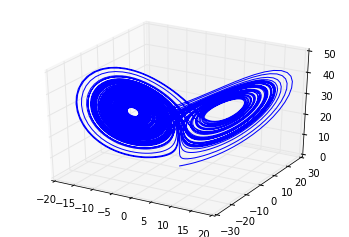

In [18]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def func(v, t, p, r, b):
    return [-p*v[0]+p*v[1], -v[0]*v[2]+r*v[0]-v[1], v[0]*v[1]-b*v[2]]

p = 10
r = 28
b = 8/3
v0 = [0.1, 0.1, 0.1]
t = np.arange(0, 100, 0.01)

v = odeint(func, v0, t, args=(p, r, b))

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(v[:, 0], v[:, 1], v[:, 2])

## 2 階の常微分方程式

次に 2 階の常微分方程式を紹介しよう.
高校の物理で出てくる**ばねの振動（単振動）**がまさにこの例だ.
項を増やすと減衰振動になったり、外力をつけたりといろいろなケースがある.
まずは一番単純な式を考えよう.

\begin{align}
 \frac{d^2 x}{dt^2}
 =
 - \omega^2 x.
\end{align}

さっきのオイラー法なりルンゲ-クッタ法なりは 1 階の方程式に対する計算法なので直接は使えない.
この場合は中間処理として $v = dx/dt$ を置いて計算すればいい.
これは単なる数値計算の便法ではない.
速度の意味もあるから, という表面的な理由ではなくもっと深く解析力学の文脈で物理としても大事な視点だ.
もっといえばシンプレクティック計算法などもっといい計算法にも発展する.

とりあえずオイラー法で計算したい.
まずは微分方程式自体を書き直す.

\begin{align}
 \frac{dx}{dt}
 =
 v, \quad
 \frac{dv}{dt}
 =
 - \omega^2 x.
\end{align}

これをオイラー法で近似しよう.

\begin{align}
 x_{n+1}
 =
 x_{n} + h v_{n}, \quad
 v_{n+1}
 =
 v_{n} - h \omega^{2} x_{n}
\end{align}

オイラー法をコードに落とす.

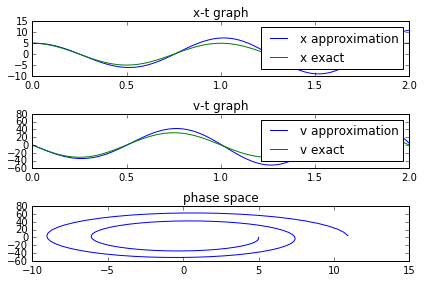

In [93]:
# coding: utf-8
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

def harmonic_euler(nt, init = (5, 0)):
    dt = t_range / (nt - 1)
    # 初期条件設定
    x = np.zeros(nt)
    v = np.zeros(nt)
    x[0] = init[0]
    v[0] = init[1]

    for i in range(1, nt):
        x[i] = x[i-1] + dt * v[i-1]
        v[i] = v[i-1] - dt * (omega ** 2) * x[i-1]
        
    # ブロードキャストがうまく動かない
    # x[1:] = x[0:-1] + dt * v[0:-1]
    # v[1:] = v[0:-1] - dt * (omega ** 2) * x[0:-1]

    return (x, v)

# 近似解
omega = 2 * np.pi
nt = 101
t_range = 2
init = (5, 0)
harm = harmonic_euler(nt, init)
t = np.linspace(0, 2, nt)
# 厳密解
x_exact = init[0] * np.cos(- omega * t)
v_exact = - omega * init[0] * np.sin(omega * t)

# グラフ描画
plt.subplot(3, 1, 1)
plt.title('x-t graph')
plt.plot(np.linspace(0, 2, nt), harm[0])
plt.plot(t, x_exact)
plt.legend(['x approximation', 'x exact'])

plt.subplot(3, 1, 2)
plt.title('v-t graph')
plt.plot(np.linspace(0, 2, nt), harm[1])
plt.plot(t, v_exact)
plt.legend(['v approximation', 'v exact'])

plt.subplot(3, 1, 3)
plt.title('phase space')
plt.plot(harm[0], harm[1])

# 描画
plt.tight_layout()

見ての通り時間が進むごとに誤差が大きくなる.
`nt` を大きくすると少しはましになる.
実際に上のコードで `nt` を大きくして再計算してみてほしい.

あとまずいのは phase space の図だ.
この系はエネルギーが保存する系だから相空間内の軌道が閉じてほしいのにそうなっていない.
シンプレクティックにやれば解消できるようだが, とにかくここではよろしくない.

この方程式でオイラー法はよろしくないことがわかった.
とりあえずルンゲ-クッタでやってみよう.

### ルンゲ-クッタ法

とりあえず近似式を書く.

\begin{align}
 x_{n+1}
 &=
 x_{n} + \frac{h}{6} (k_{1} + 2 k_{2} + 2 k_{3} + k_{4}), \\
 t_{n+1}
 &=
 t_{n} + h, \\
 k_{1}
 &=
 v_{n}, \\
 k_{2}
 &=
 v_{n} + \frac{h}{2} k_{1}, \\
 k_{3}
 &=
 v_{n} + \frac{h}{2} k_{2}, \\
 k_{4}
 &=
 v_{n} + h k_{3}.
\end{align}

次が $v$ の式.

\begin{align}
 v_{n+1}
 &=
 v_{n} + \frac{h}{6} (k_{1} + 2 k_{2} + 2 k_{3} + k_{4}), \\
 t_{n+1}
 &=
 t_{n} + h, \\
 k_{1}
 &=
 - \omega^2 x_{n}, \\
 k_{2}
 &=
 x_{n} - \frac{h}{2} \omega^2 k_{1}, \\
 k_{3}
 &=
 x_{n} - \frac{h}{2} \omega^2 k_{2}, \\
 k_{4}
 &=
 x_{n} - h \omega^2 k_{3}.
\end{align}

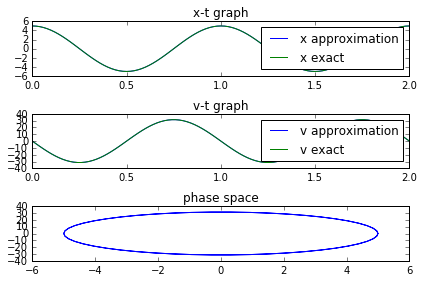

In [96]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

def harmonic_rk(nt, init = 10):
    dt = t_range / (nt - 1)
    # 初期条件設定
    x = np.zeros(nt)
    v = np.zeros(nt)
    x[0] = init[0]
    v[0] = init[1]

    def fx(t, x, v):
        return v

    def fv(t, x, v):
        return - (omega ** 2) * x

    # ブロードキャストで書き直したい
    for i in range(1, nt):
        xk1 = fx(dt * (i - 1), x[i-1], v[i-1])
        vk1 = fv(dt * (i - 1), x[i-1], v[i-1])

        xk2 = fx(dt * (i - 1/2), x[i-1] + xk1 * dt / 2, v[i-1] + vk1 * dt / 2)
        vk2 = fv(dt * (i - 1/2), x[i-1] + xk1 * dt / 2, v[i-1] + vk1 * dt / 2)

        xk3 = fx(dt * (i - 1/2), x[i-1] + xk2 * dt / 2, v[i-1] + vk2 * dt / 2)
        vk3 = fv(dt * (i - 1/2), x[i-1] + xk2 * dt / 2, v[i-1] + vk2 * dt / 2)

        xk4 = fx(dt * (i - 1),   x[i-1] + xk3 * dt,     v[i-1] + vk3 * dt)
        vk4 = fv(dt * (i - 1),   x[i-1] + xk3 * dt,     v[i-1] + vk3 * dt)

        x[i] = x[i-1] + dt / 6 * (xk1 + 2 * xk2 + 2 * xk3 + xk4)
        v[i] = v[i-1] + dt / 6 * (vk1 + 2 * vk2 + 2 * vk3 + vk4)

    return (x, v)

# 近似解
omega = 2 * np.pi
nt = 101
t_range = 2
init = (5, 0)
harm = harmonic_rk(nt, init)
t = np.linspace(0, 2, nt)

# 厳密解
x_exact = init[0] * np.cos(- omega * t)
v_exact = - omega * init[0] * np.sin(omega * t)

# グラフ描画
plt.subplot(3, 1, 1)
plt.title('x-t graph')
plt.plot(np.linspace(0, 2, nt), harm[0])
plt.plot(t, x_exact)
plt.legend(['x approximation', 'x exact'])

plt.subplot(3, 1, 2)
plt.title('v-t graph')
plt.plot(np.linspace(0, 2, nt), harm[1])
plt.plot(t, v_exact)
plt.legend(['v approximation', 'v exact'])

plt.subplot(3, 1, 3)
plt.title('phase space')
plt.plot(harm[0], harm[1])

# 描画
plt.tight_layout()

今度の一致具合はなかなかよさそう.
何より良くなったのは相空間軌道だ: ちゃんと閉じてくれた.